Epoch [100/1000], Loss: 0.8519
Epoch [200/1000], Loss: 0.8229
Epoch [300/1000], Loss: 0.8149
Epoch [400/1000], Loss: 0.8108
Epoch [500/1000], Loss: 0.8087
Epoch [600/1000], Loss: 0.8077
Epoch [700/1000], Loss: 0.8071
Epoch [800/1000], Loss: 0.8069
Epoch [900/1000], Loss: 0.8067
Epoch [1000/1000], Loss: 0.8067


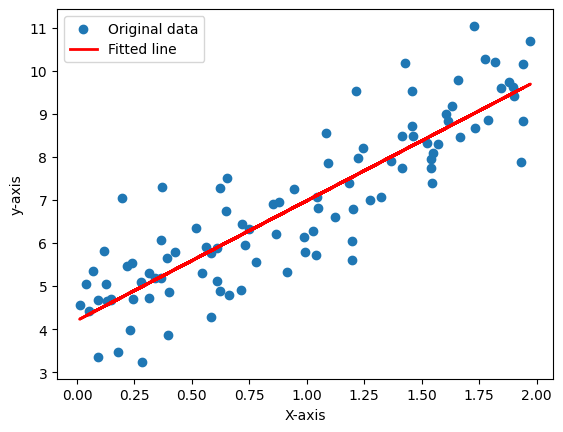

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic linear regression data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Convert data to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Define a linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
model = LinearRegressionModel()

# Define loss function (Mean Squared Error) and optimizer (Stochastic Gradient Descent)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(X_tensor)
    loss = criterion(predictions, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the original data and the regression line
plt.scatter(X, y, label='Original data')
plt.plot(X, model(X_tensor).detach().numpy(), color='red', linewidth=2, label='Fitted line')
plt.xlabel('X-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()
